<p align="center">
   <img src="img/logo.png">
</p>

## Descenso por gradiente f(x, y)

### Boletín de prácticas 2
**Alumno:** Frank Montalvo Ochoa<br/>
**Fecha:** 19/05/2018

### Objetivos:
* Familiarizarse con los principales aspectos y etapas del método de descenso por gradiente para funciones que dependen de dos variables $f(x,y)$.
* Conocer cómo aplicar el proceso de descenso por gradiente de forma automatizada con soporte de **sympy** y **Jupyter Notebook*.

### Enunciado:

1. Seleccionar una función matemática $f(x,y)$ para realizar el proceso de minimización. Ejecutar al menos **3 pasos** del método de descenso por gradiente. 
2. Diseñar y desarrollar un cuaderno en Jupyter Notebook donde se realicen todos los pasos correspondientes al proceso de minimización de la función a través del método de descenso por gradiente.
3. El cuaderno deberá incluir los siguientes puntos:
    1. Gráfica de la función y los puntos que se obtienen a medida que se ejecutan los pasos de cálculo (hasta $k=3$).
    2. Aplicación de las funciones de derivación y evaluación de forma similar a la que se ha detallado en el presente cuaderno.
    3. Incluir un acápite sobre las funciones cóncavas y los puntos estacionarios (incluir gráficos).
    4. Emplear las funcionalidades que proveen los paquetes **matplotlib** y **sympy**.

  
### Criterios de evaluación:
Los criterios o rúbrica de evaluación del Boletín de Prácticas 2 son los siguientes:
1. Adecuada complejidad de la función seleccionada para el proceso de minimización (procurar no usar funciones cóncavas).
2. Mejorar la gráfica en 3D presentada en este cuaderno.
3. Correcta explicación y detalle de cada paso ejecutado con el método de descenso por gradiente.
4. Verificación de la solución encontrada.
5. Elementos extra: incluye recta (flecha) con la dirección del gradiente, animaciones, etc.
6. Ejecutar los pasos indicados en el segundo video-tutorial.

### Prerrequisitos:
A fin de poder realizar esta práctica, deberá contar con los siguientes prerrequisitos:
1. Haber leído de forma completa el presente cuaderno.
2. Tener instalados los siguientes paquetes en su computador:
    1. Python 2.7+ (de preferencia 3.6+)
    2. [Sympy](http://www.sympy.org)
    3. [matplotlib](https://matplotlib.org/)

### Resolución

**Función a minimizar:**<br>
<div style="text-align:center">
$f(x,y)=7x^{3} + \frac{2}{5}x^{2}y + y^{2}$
</div>

**Punto inicial:**<br>
<div style="text-align:center">
    $x^{(0)} = 5$<br>
    $y^{(0)} = 2$
</div>

**Derivada:**<br>
<div style="text-align:center">
    $\nabla f(x,y) =  \binom{\frac{\partial f(x,y)}{\partial x}}{\frac{\partial f(x,y)}{\partial y}}= \binom{21x^{2}+\frac{4}{5}xy}{\frac{2}{5}x^{2}+2y} $ 
</div>

1. Evaluamos a nuestra función original y su derivada en el punto inicial que habíamos definido anteriormente:<br>
<div style="text-align:center">
    $f(5,2)=7(5)^{3} + \frac{2}{5}(5)^{2}(2) + (2)^{2}$<br>
    $f(5,2)=875 + 20 + 4$<br>
    $f(5,2)=899$
</div>

<div style="text-align:center">
    <br>$\nabla f(x,y) =  \binom{\frac{\partial f(x,y)}{\partial x}}{\frac{\partial f(x,y)}{\partial y}}= \binom{21(5)^{2}+\frac{4}{5}(5)(2)}{\frac{2}{5}(5)^{2}+2(2)} $ 
   <br>$\nabla f(5,2) = (533, 14)$<br>
</div>

2. Buscamos el punto ($x^{(k+1)}$, $y^{(k+1)}$), para lo cual debemos calcular lo siguiente:
<div style="text-align:center">
    <br />$\theta^{'}(t)=-\nabla f\left( (x^{(0)},y^{(0)} )- t \nabla f(x^{(0)},y^{(0)}) \right) \nabla f(x^{(0)},y^{(0)})$ <br/ >
    <br />$=-\nabla f\left( (5,2)- t \nabla f(5,2)  \right) \nabla f(x^{(0)},y^{(0)})$ <br/ >
</div>   

<div style="text-align:center">
    <br />$=-\nabla f\left( (5,2)- t (533,14)  \right) (533,14)$ <br/ >
    <br />$=-\nabla f\left( (5-533t),(2-14t) \right) (533,14)$ <br/ >
</div>   

<div style="width: 100%; text-align:center;">
   <div style="width: 50%;float:left;">
        <br>$x = (5-533t)$<br>
   </div>

   <div style="width: 50%;float:right;">
        <br>$y = (2-14t)$<br>
   </div>
<div>
<br><br>
<div style="text-align:center">
    <br>$=-\left( 21\cdot (5-533t)^{2} + 0.8(5-533t)(2-14t), 0.4\cdot(5-533t)^{2} + 2\cdot(2-14t) \right) (533,14)$<br>
    <br>$=-\lbrace{533\left( 21\cdot (5-533t)^{2} + 0.8(5-533t)(2-14t)\right)+14\left( (0.4\cdot(5-533t)^{2} + 2\cdot(2-14t) \right) \rbrace}$<br>
</div> 

Valor en el punto (x^(0),y^(0)) => (5,2) = 899.000000000000


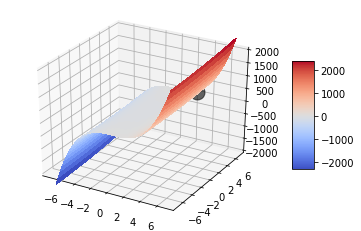

dx: 21*x**2 + 0.8*x*y
dy: 0.4*x**2 + 2*y
dx: 533.000000000000
dy: 14.0000000000000


In [13]:
from sympy import Function, Symbol, diff, solve
import matplotlib.pyplot as pp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

x = Symbol('x')
f_x = Function('fx')(x)
y = Symbol('y')
f_y = Function('fy')(y)

t = Symbol('t')
f_t = Function('ft')(t)

x_0 = 5
y_0 = 2

f_xy = 7 * x**3 + 2/5 * x**2 * y + y**2
y_dx = f_xy.diff(x)
y_dy = f_xy.diff(y)

def fxy(x,y):
	return 7 * x**3 + ((2/5) * x**2 * y) + y**2

def grafica(x_0,y_0,lim=50):
	fig=pp.figure()
	axes=fig.gca(projection='3d')
	x=np.arange(-7.,7.,0.1)
	y=np.arange(-7.,7.,0.1)
	x,y=np.meshgrid(x,y)
	z=fxy(x,y)
	surface=axes.plot_surface(x,y,z,cmap=cm.coolwarm,linewidth=0,antialiased=False)
	point=axes.plot([x_0], [y_0], fxy(x_0,y_0), markerfacecolor='k', markeredgecolor='k', \
                    marker='o', markersize=15, alpha=0.6)
	axes.set_zlim(-2000,2000)
	fig.colorbar(surface, shrink=0.5, aspect=5)
	pp.show()
    
def datos(x_0,y_0,f_xy,i):
	resultado=f_xy.subs(x,x_0).subs(y,y_0).evalf()
	print("Valor en el punto (x^("+str(i)+"),y^("+str(i)+")) => ("+str(x_0)+","+str(y_0)+") =",resultado)
	return resultado
res = datos(x_0,y_0,f_xy,0)
grafica(x_0, y_0)

print('dx:',y_dx)
print('dy:',y_dy)

dx = y_dx.subs(x,x_0).subs(y,y_0).evalf()
dy = y_dy.subs(x,x_0).subs(y,y_0).evalf()

print('dx:',dx)
print('dy:',dy)

<p align="center">
   <img src="img/fig1.png">
</p>

In [2]:
from sympy import Function, Symbol, diff, solve

t=Symbol('t')
ft=Function('ft')(t)

fnabla=-(533 * (21 * (5-533*t)**2 + 0.8*(5-533*t) * (2-14*t)) + 14*(0.4 * (5-533.*t)**2 + 2*(2-14*t)))

print(fnabla.expand())

fnablap=fnabla.diff(t)


print("Derivada para buscar raices: ",fnablap)
print("Raices: [",solve(fnablap),"]")

-3184580872.2*t**2 + 60173320.4*t - 284285.0
Derivada para buscar raices:  -6369161744.4*t + 60173320.4
Raices: [ [0.00944760438104851] ]


3. Dado lo anterior, el siguiente punto $(x^{(1)},y^{(1)})$ será:
<div style="text-align:center">
    <br />$(x^{(1)},y^{(1)})=(x^{(0)},y^{(0)})-t^{*}_{0} \nabla f(x^{(0)},y^{(0)})$ <br/ >
    <br />$(x^{(1)},y^{(1)})=(5,2)-0.00944760438104851\cdot (533, 14)$ <br/ >
    <br />$(x^{(1)},y^{(1)})=(-0.0355731351, 1.867733539)$ <br/ >
</div>


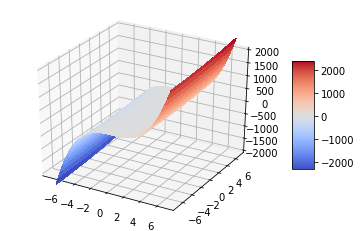

In [14]:
grafica(-0.0355731351,1.867733539)

<p align="center">
   <img src="img/fig2.png">
</p>

[Repositorio Github](https://github.com/FGMO/Descenso_por_gradiente/)